In [1]:
#load in relevant library's
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#load in both datasets
df = pd.read_csv("Assignment 2 - data Mashable to be predicted.csv")
df2 = pd.read_csv("Assignment 2 - data Mashable.csv")

In [3]:
#print out the head of our dataframe
df2.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


In [4]:
#making 2 dataframes with the non binary variables for plotting and testing purposes (plotting with the whole dataframe makes things very messy and causes long loading times)
df_research = df2.loc[:, " global_subjectivity" : "shares_log"]
df_research2 = df2[[" n_tokens_title", " n_tokens_content", " num_imgs", " num_videos", " average_token_length", " shares", "shares_log"]]

#here we make and extra dataframe for the weekdays, so we can look if these variables have any influence on the shares
df_researchweek = df2[[" weekday_is_monday", " weekday_is_tuesday", " weekday_is_wednesday", " weekday_is_thursday", " weekday_is_friday", " weekday_is_saturday", " weekday_is_sunday", " is_weekend", " shares"]]

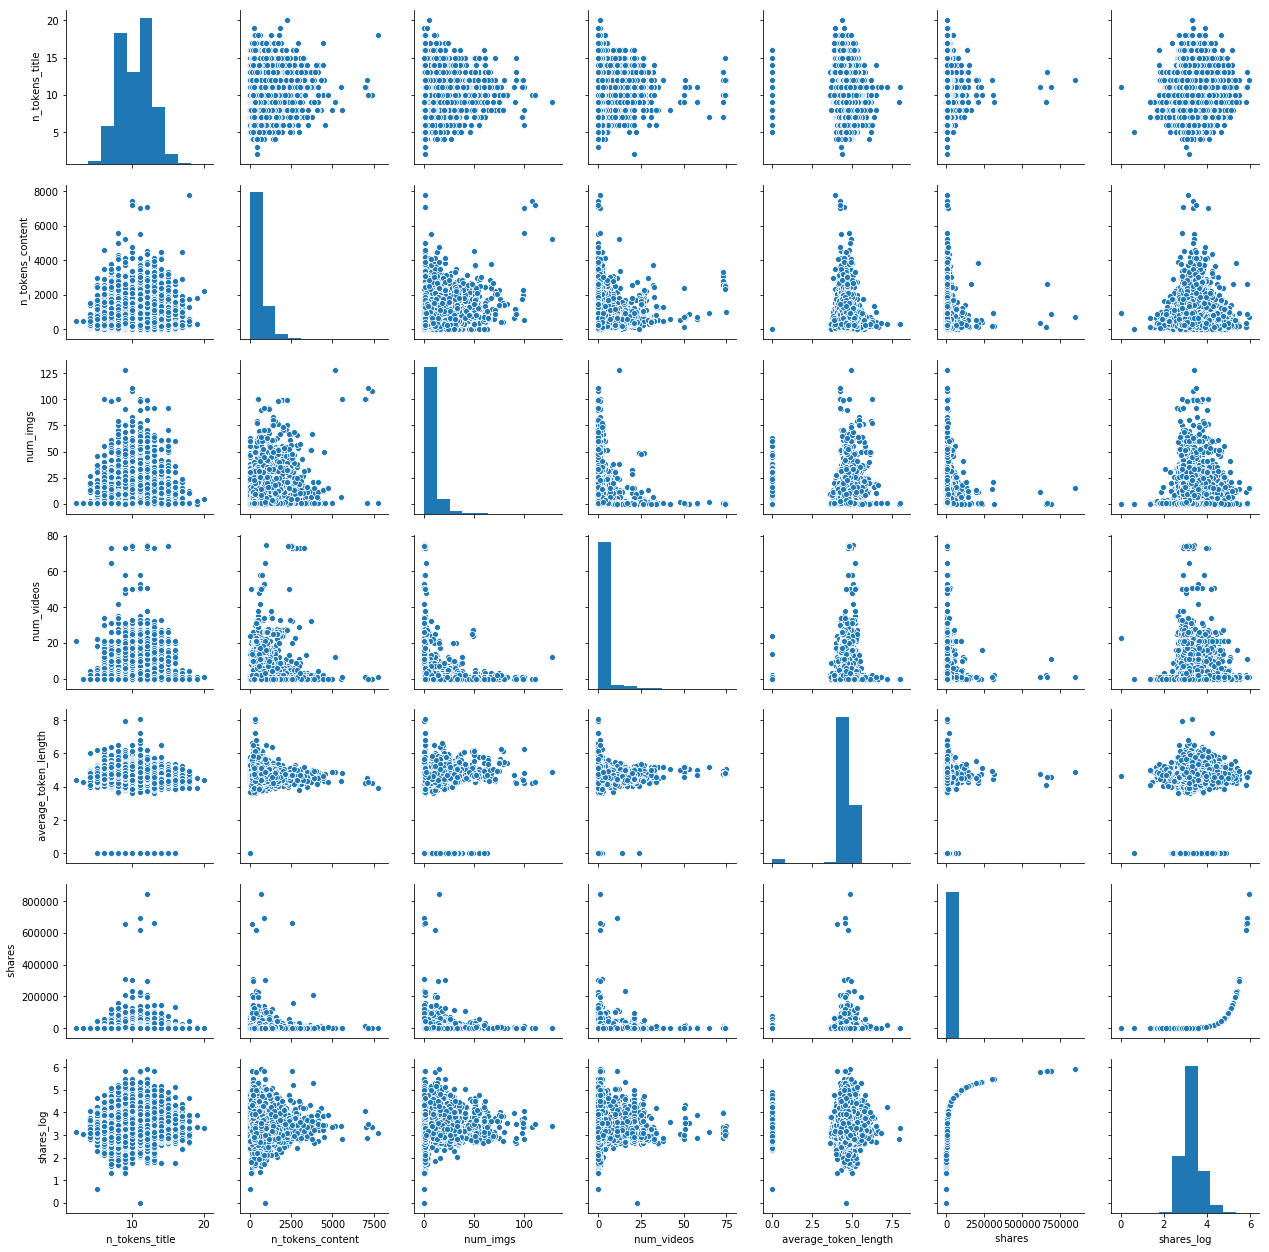

In [5]:
#making a pairplot of the different variables to find linair reggresion part 1
sns.pairplot(df_research2)

#### looking at the plots (1/3)
Here we look at all the variables, because of so much datapoints, i can't really find clear reggresions between variables, the clearest reggersions are mabye num_videos, n_tokens_content and num_imgs. These may have negative reggersions.

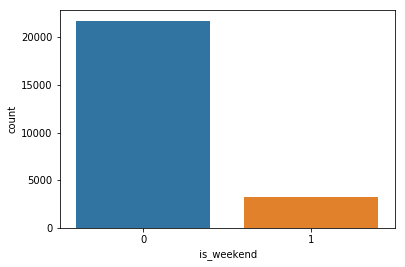

In [6]:
#plotting to see if the weekend has influence ons shares, with countplot
sns.countplot(x = df_researchweek[" is_weekend"])

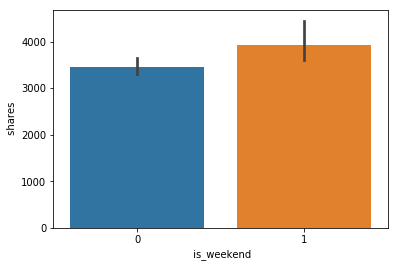

In [7]:
#plotting to see if the weekend has influence ons shares, with barplot
sns.barplot(x = df_researchweek[" is_weekend"], y = df_researchweek[" shares"])

#### Looking at the plots (2/3)
If we look here, the weekend causes way more shares even though there is way less time in the week. So if it's weekend has a great influence on the amount of shares.

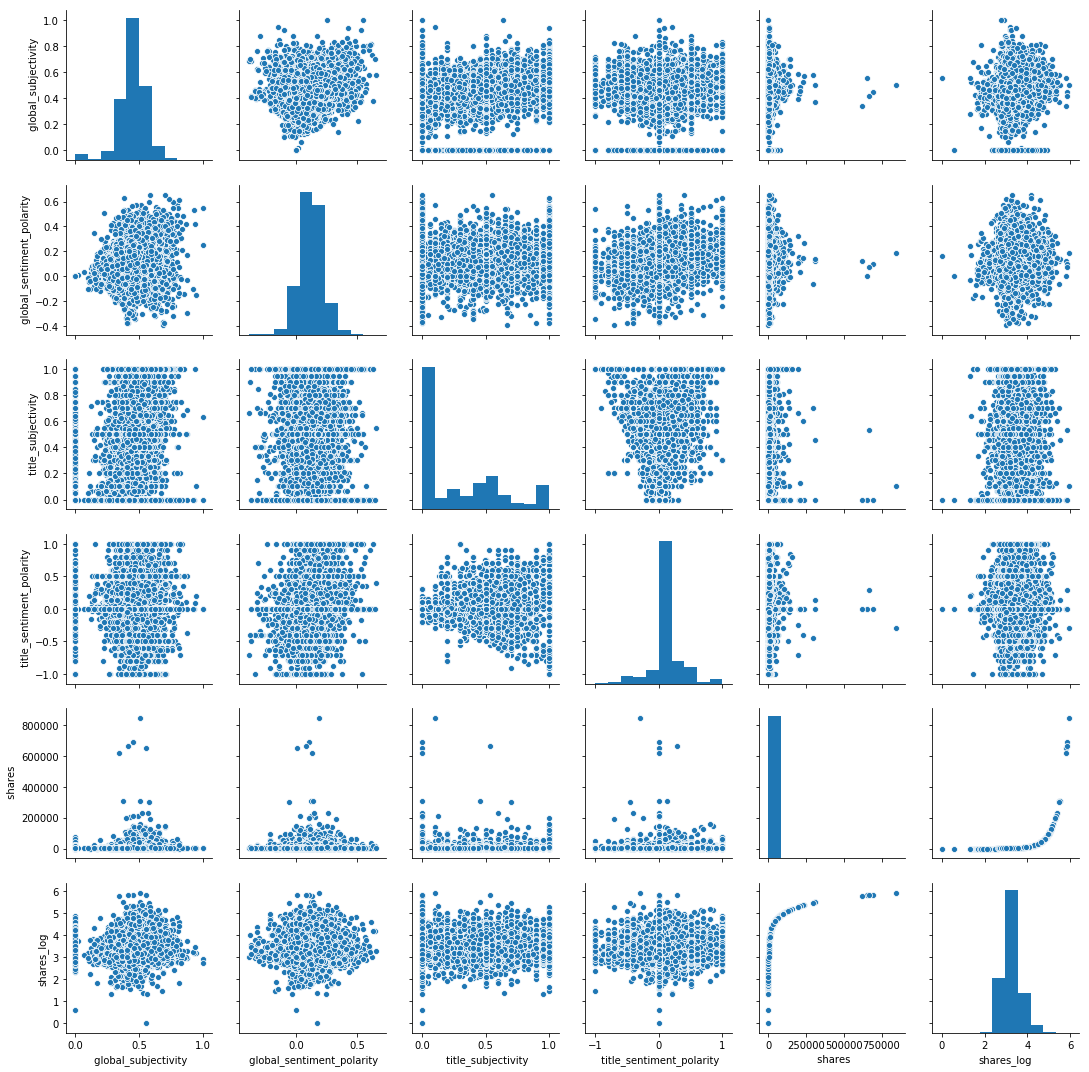

In [8]:
#making a pairplot of the different variables to find linair reggresion part 2
sns.pairplot(df_research)

#### Looking at the plots (3/3)
Here we can see mabye title_subjectivity and title_sentiment_polarity, but still no visible reggersion, so i'm going to look for other ways than the naked eye. I am going to preform a stepwise reggresion to find the pearson correlation coefficient and P value of each of the possible variables to number of shares. At this point i am going to just choose based on the most correlative numbers.

In [9]:
#here we define a function which we can use to find all the pearson R relations for a dataframe. The requirement being that the dataframe contains the "share" collumn.
def list_correlation(dataframe):
    for column in dataframe:
        print(f"pearson for {column}:")
        print(pearsonr(dataframe[' shares'],dataframe[column]))

#here we put both of our test dataframes into the function to get a list of relations
list_correlation(df_research2)
list_correlation(df_research)

pearson for  n_tokens_title:
(0.011404310294523278, 0.07137059761698342)
pearson for  n_tokens_content:
(0.009624741935203723, 0.12807573639733227)
pearson for  num_imgs:
(0.03739450614361387, 3.334011713519464e-09)
pearson for  num_videos:
(0.025690597784076084, 4.856529170660159e-05)
pearson for  average_token_length:
(-0.007093811634325841, 0.2620471438789379)
pearson for  shares:
(1.0, 0.0)
pearson for shares_log:
(0.4833218525444597, 0.0)
pearson for  global_subjectivity:
(0.0420486431463652, 2.9120675421672236e-11)
pearson for  global_sentiment_polarity:
(0.008655258261371979, 0.1711724130933289)
pearson for  title_subjectivity:
(0.019736408224830155, 0.001804305422674339)
pearson for  title_sentiment_polarity:
(0.009655239543685907, 0.12687142366737927)
pearson for  shares:
(1.0, 0.0)
pearson for shares_log:
(0.4833218525444597, 0.0)


#### Looking at the correlations
As we can see there are 4 variables that have a strong correlation with the amount of shares:
1. num_imgs
2. num_videos
3. global_subjectivity
4. title_subjectivity

So these 4 variables we are going to use for sure. For the last variable we could see above that the weekend has influence on the amount of shares. so our last variable for X is is_weekend

In [10]:
#Fit everything into X and Y axis and split it into a training and test set. After this we create our LM object and fit the model.
X = df2[[" num_imgs", " data_channel_is_lifestyle", " data_channel_is_bus", " data_channel_is_socmed", " data_channel_is_tech", " global_subjectivity", " average_token_length", " is_weekend"]]
y = df2["shares_log"]
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X, y, test_size=0.3)
lm = LinearRegression();
lm.fit(X_train_l, y_train_l);

#### Selecting the variables
for the first original combination of variables:
1. is_weekend
2. num_imgs
3. num_videos
4. global_subjectivity
5. title_subjectivity

We see an R2 score of 0.0276. Which is to low for my taste. I think the problem here is that num_imgs and num_videos are also correlated very closley with each other, so only 1 is needed for our prediction. The same with global_subjectivity and title_subjectivity. So we remove num_videos and exchange it with data_channel and remove title_subjectivity with average_token_length. This way our variables won't overlap in predictions.
The final equation of our model is:

$ predicted shares log = 3.0607366093490564 + 0.00373136 * num imgs + 0.07346913 * dcislifestyle + 0.02075159 * dcisbus + 0.16722536 * dcissocmed + 0.06939276 * dcistech + 0.25427279 * global subjectivity + -0.05854953 * averagetokenlength + 0.12569876 * isweekend + E$

Unfortunately the equation is to big fit nicely into the markdown (it can be seen as a whole if you double click of course), but of course we start with the intercept. After that we multiply every variable with it's coefficient. dcis stands for data_channel_is. The number for the variable here is of course if it has 1.

In [12]:
#make a prediction collom for our guess shares and plot these against eachother
df2["shares_p"] = lm.predict(X)

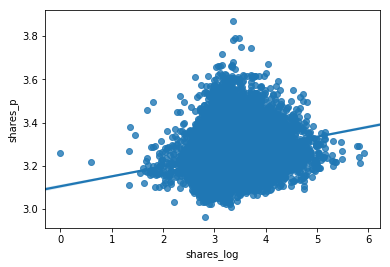

In [13]:
#make a scatterplot of prediction against actual values
sns.regplot(x = "shares_log", y = "shares_p", data=df2)

In [14]:
#calculate the R2 score of the model
r2_score(df2['shares_log'], df2['shares_p']) #this gives the model fit (R2) for the Y and predicted Y

0.04542804415115431

Now we get a score of 0.0456 instead of 0.0276, which is a lot better.

In [15]:
#right here we make a new X variable for the holdout file and run the prediction based on the model, so we get a shares_log for the holdout file
X_holdout = df[[" num_imgs", " data_channel_is_lifestyle", " data_channel_is_bus", " data_channel_is_socmed", " data_channel_is_tech", " global_subjectivity", " average_token_length", " is_weekend"]]
df["shares_log"] = lm.predict(X_holdout)
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,25001,http://mashable.com/2013/11/04/bought-apartmen...,12,330,1,0,4.533333,0,0,0,...,0,0,0,0,0.366459,0.073390,0.000000,0.000000,NaN,3.155130
1,25002,http://mashable.com/2013/03/13/get-in-car-ente...,10,501,1,0,4.319361,1,0,0,...,0,0,0,0,0.532966,0.213349,0.454545,0.136364,NaN,3.324701
2,25003,http://mashable.com/2013/10/01/samsung-galaxy-...,10,2500,13,1,4.390000,0,0,0,...,0,0,0,0,0.498828,0.140832,0.500000,-0.100000,NaN,3.340427
3,25004,http://mashable.com/2013/02/11/justin-timberla...,10,266,5,0,5.195489,0,1,0,...,0,0,0,0,0.476431,0.259596,0.600000,0.200000,NaN,3.189551
4,25005,http://mashable.com/2014/06/05/nicolas-cage-pr...,11,735,0,16,4.571429,0,1,0,...,0,0,0,0,0.466519,0.050424,0.000000,0.000000,NaN,3.197306


#### Evaluating the model
If we look at the predictions there all between 3.1 and 3.8. Which is logical because looking at the scatterplot every prediction is between this number. So the predictions are probably not that reliable, this is because it's not the strongest dataset for linair reggresion.